<a href="https://colab.research.google.com/github/vinigoia/MODELO-PARA-CHURN-PREDICTION-EM-EMPRESA-DE-TELECOMUNICACOES/blob/main/Modelo_para_Churn_Prediction_em_Empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODELO PARA CHURN PREDICTION EM EMPRESA DE TELECOMUNICAÇÕES**

_______________________________________________________________________________

## ***Se você está com pressa!!!***
________________________________________________________________________________

O objetivo deve estudo é explorar dados de *churn* para geração de insights e um modelo de previsão. Vários algoritmos foram utilizados para verificação de métricas e técnicas de *Feature  Scaling*, Balanceamento e otimização de hiperparâmetros foram utilizadas. Ao final, o algoritmo *XGBClassifier* obteve uma das maiores pontuações e foi escolhido para *tuning*, possuindo um resultado satisfatório na geração do modelo de predição.

## ***Contextualizando...***

_______________________________________________________________________________

*Churn* nada mais é do que o número de disistência de clientes que já fazem parte de uma cartela de consumidores. Quando se fala em planos ou assinaturas, as grandes empresas envolvendo telefonia e televisão são as primeiras que vem em mente, porém, atualmente, com o advento da internet, diversos concorrentes de streaming disputam o mesmo terreno, o que faz do *churn* uma métrica essencial para marketing e retenção. Afinal, segundo Kim e Lee (2021), reter clientes chega a ser seis vezes mais barato que conseguir novos consumidores.
_______________________________________________________________________________

<p align=center>
<img src="https://img.freepik.com/vetores-gratis/cancelar-ilustracao-de-conceito_114360-3620.jpg?w=826&t=st=1674156937~exp=1674157537~hmac=8d10622b653d8ec5b229e216258e2bbe42cd405811c0334e1f4f2d29df0bdc0f" width="40%"></p>

_______________________________________________________________________________
Segundo Sulikowski e Zdziebko (2021), as razões dos clientes desistirem de uma assinatura podem ser divididas em duas partes: compulsórias e voluntárias. O primeiro tipo é tipicamente causado por circunstâncias que fogem do controle da empresa, como problemas financeiros, relocações ou uma proposta mais atrativa feita por uma concorrente. Já com as razões voluntárias, a empresa tem total responsabilidade sobre elas. Os motivos incluem má qualidade dos serviços ofertados, não cumprimento de ações, falta de maleabilidade de acertos, etc.

_______________________________________________________________________________

<p align=center>
<img src="https://cdn-icons-png.flaticon.com/512/1138/1138564.png?w=826&t=st=1674157007~exp=1674157607~hmac=9da593e36742fdb1c89a6db110e5c8e50c83db2d7e5007af4a01309da4bc54d9" width="30%"></p>

_______________________________________________________________________________

A partir do momento que há a possibilidade de previsão de pessoas que deixarão de assinar algum serviço, as equipes de marketing podem entrar em ação e disparar novos anúncios e promoções para tentar reter esses clientes, diminuindo assim a taxa de *churn*;
_______________________________________________________________________________

## ***Sobre os Dados***
______________________________________________________________________________

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Neste momento, iremos importar as bibliotecas necessárias e transformar o *dataset* em questão em um *Dataframe*, salvando-o em uma varíavel. Logo após, verificaremos as primeiras entradas e a dimensão de nossos dados.

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do estilo de plotagem
sns.set_style('dark')

In [2]:
# Leitura do arquivo .csv em um dataframe
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Visualização das primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Visualização do tamanho do dataset
print("O Dataset possui {} linhas e {} colunas.".format(df.shape[0], df.shape[1]))

O Dataset possui 7043 linhas e 21 colunas.


### **Dicionário de Variáveis**
______________________________________________________

Sendo assim, as variáveis disponíveis são:

* `customerID` : sequência individual para identificação de cliente;

* `gender` : gênero do cliente;

* `SeniorCitizen` : clientes com 65 anos ou mais;

* `Partner` : clientes com companheiros;

* `Dependents` : clientes com dependentes;

* `tenure` : posses de clientes;

* `PhoneService` : serviços de telefone contratados;

* `MultipleLines` : clientes com mais de uma linha;

* `InternetService` : tipo de serviço de internet contratado;

* `OnlineSecurity` : clientes com serviço segurança online contratado;

* `OnlineBackup` : clientes com serviços de backup contratados;

* `DeviceProtection` : clientes com serviços de proteção de aparelho contratado;

* `TechSupport` : clientes com serviços de tecnologia contratado;

* `StreamingTV` : clientes com serviços de streaming de TV contratado;

* `StreamingMovies` : clientes com serviços de streaming de Filmes contratado;

* `Contract` : tipo de contrato;

* `PaperlessBilling` : clientes que utilizam serviços de e-mail para recebimento de contas, notícias, promoçoes;

* `PaymentMethod` : método de pagamento;

* `MonthlyCharges` : encargos mensais;

* `TotalCharges` : total de encargos;

* `Churn` : clientes que cancelaram a assinatura.

## ***Análise Exploratória***
______________________________________________________



### **O primeiro contato**
______________________________________________________

Antes de começar qualquer análise, iremos utilizar alguns métodos para verificação de informações básicas do *dataset*, como valores médios, valores ausentes, e os tipos de variáveis presentes.

In [10]:
# Descrição geral do dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


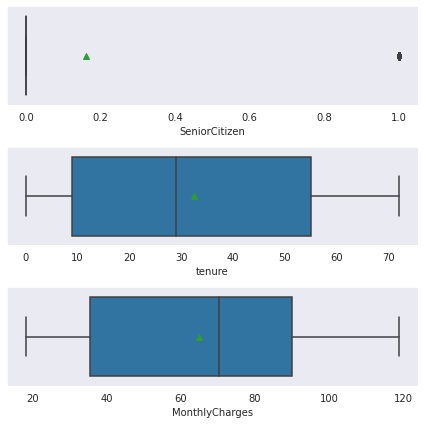

In [11]:
# Configurações para plotagem de boxplot
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6,6))

sns.boxplot(df.SeniorCitizen,ax=ax[0],showmeans=True)
sns.boxplot(df.tenure,ax=ax[1], showmeans=True)
sns.boxplot(df.MonthlyCharges,ax=ax[2], showmeans=True)

plt.tight_layout()
plt.show()

Um dado importante que se observa acima é que, além do *dataset* não possuir outliers, apenas 3 atributos são considerados numéricos. Vamos verificar melhor essa informação com o método abaixo.

In [ ]:
# Verificação dos tipos de variáveis presentes no dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Confirma-se então que apenas 3 atributos são considerados numéricos e que não há nenhum valor ausente. Porém a coluna *TotalCharges* tem a mesma natureza da *MonthlyCharges* e está sendo considerada string. Vamos converter essa coluna. Mas antes, criaremos uma cópia do *dataset* original.

In [16]:
# Cópia do dataset original
df_churn = df.copy()

In [ ]:
# Tentativa de conversão da coluna para float
df_churn.TotalCharges = df.TotalCharges.astype(float)

ValueError: ignored

Observa-se aqui que, apesar de não haver dados ausentes, temos informações preenchidas como se fossem dados ausentes. Conseguimos observar isso através do *value_counts*. Dessa maneira, iremos criar uma função para substituir essas informações por NAN e depois substituí-los pelo valor mediano da coluna.

In [14]:
# Verificação dos dados inseridos incorretamente
df_churn.TotalCharges.value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [18]:
# Função para conversão de variável
def convert (entrada):
  ### Essa função tenta transformar as variáveis string em float e, caso não consiga devido aos valores ausentes, transforma ela em nan.###
  try:
    return float(entrada)
  except ValueError:
    return np.nan

# Aplicação da função
df_churn['TotalCharges'] = df_churn['TotalCharges'].apply(convert)

# Substituição dos valores nan pela mediana da coluna
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median(),inplace=True)


In [ ]:
#Verificação da transformação dos valores floats
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Descrição do dataset com a nova coluna transformada
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


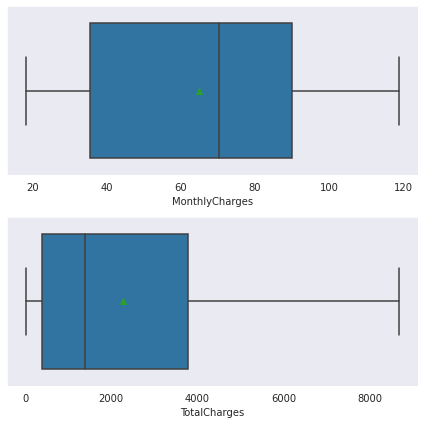

In [ ]:
# Configurações para plotagem de boxplot
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,6))

sns.boxplot(df_churn.MonthlyCharges,ax=ax[0],showmeans=True)
sns.boxplot(df_churn.TotalCharges,ax=ax[1], showmeans=True)

plt.tight_layout()
plt.show()

Como temos poucas variáveis numéricas, vamos verificar a variação de valores de nosso *dataset*, evidenciando quais colunas são categóricas.

In [ ]:
#Verificação de colunas categóricas
df_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Observa-se que temos 17 colunas com características categóricas e variações de 2 a 4 elementos.

O atributo *customerID* possui um valor específico para cada cliente e essa informação, por enquanto, não agregará em nosso processo. Portanto, a coluna será excluída.

In [19]:
# Exclusão da coluna customerID
df_churn.drop('customerID', axis=1, inplace=True)

Vamos verificar agora se a nossa variável alvo encontra-se desbalanceada no *dataset*.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


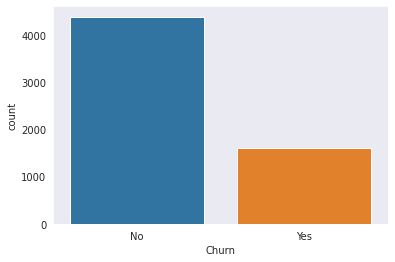

In [ ]:
# Plot para verificação de balanceamento
sns.countplot(df_churn['Churn'])

Como observado, os dados estão desbalanceados, o que nos exigirá futuramente um procedimento para equalizar essa proporção.

Iremos agora realizar algumas explorações em cima dos clientes os quais o *churn* foi positivo. Para isso, criaremos um *dataset* específico apenas com essas seleções.

In [20]:
# Dataset apenas com clientes que desistiram das assinaturas
df_churn_positive = df_churn.loc[df_churn['Churn']=='Yes']

# Visualização das primeiras entradas
df_churn_positive.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [23]:
print("o Dataset possui {} linhas e {} colunas.".format(df_churn_positive.shape[0],df_churn_positive.shape[1]))

o Dataset possui 1869 linhas e 20 colunas.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

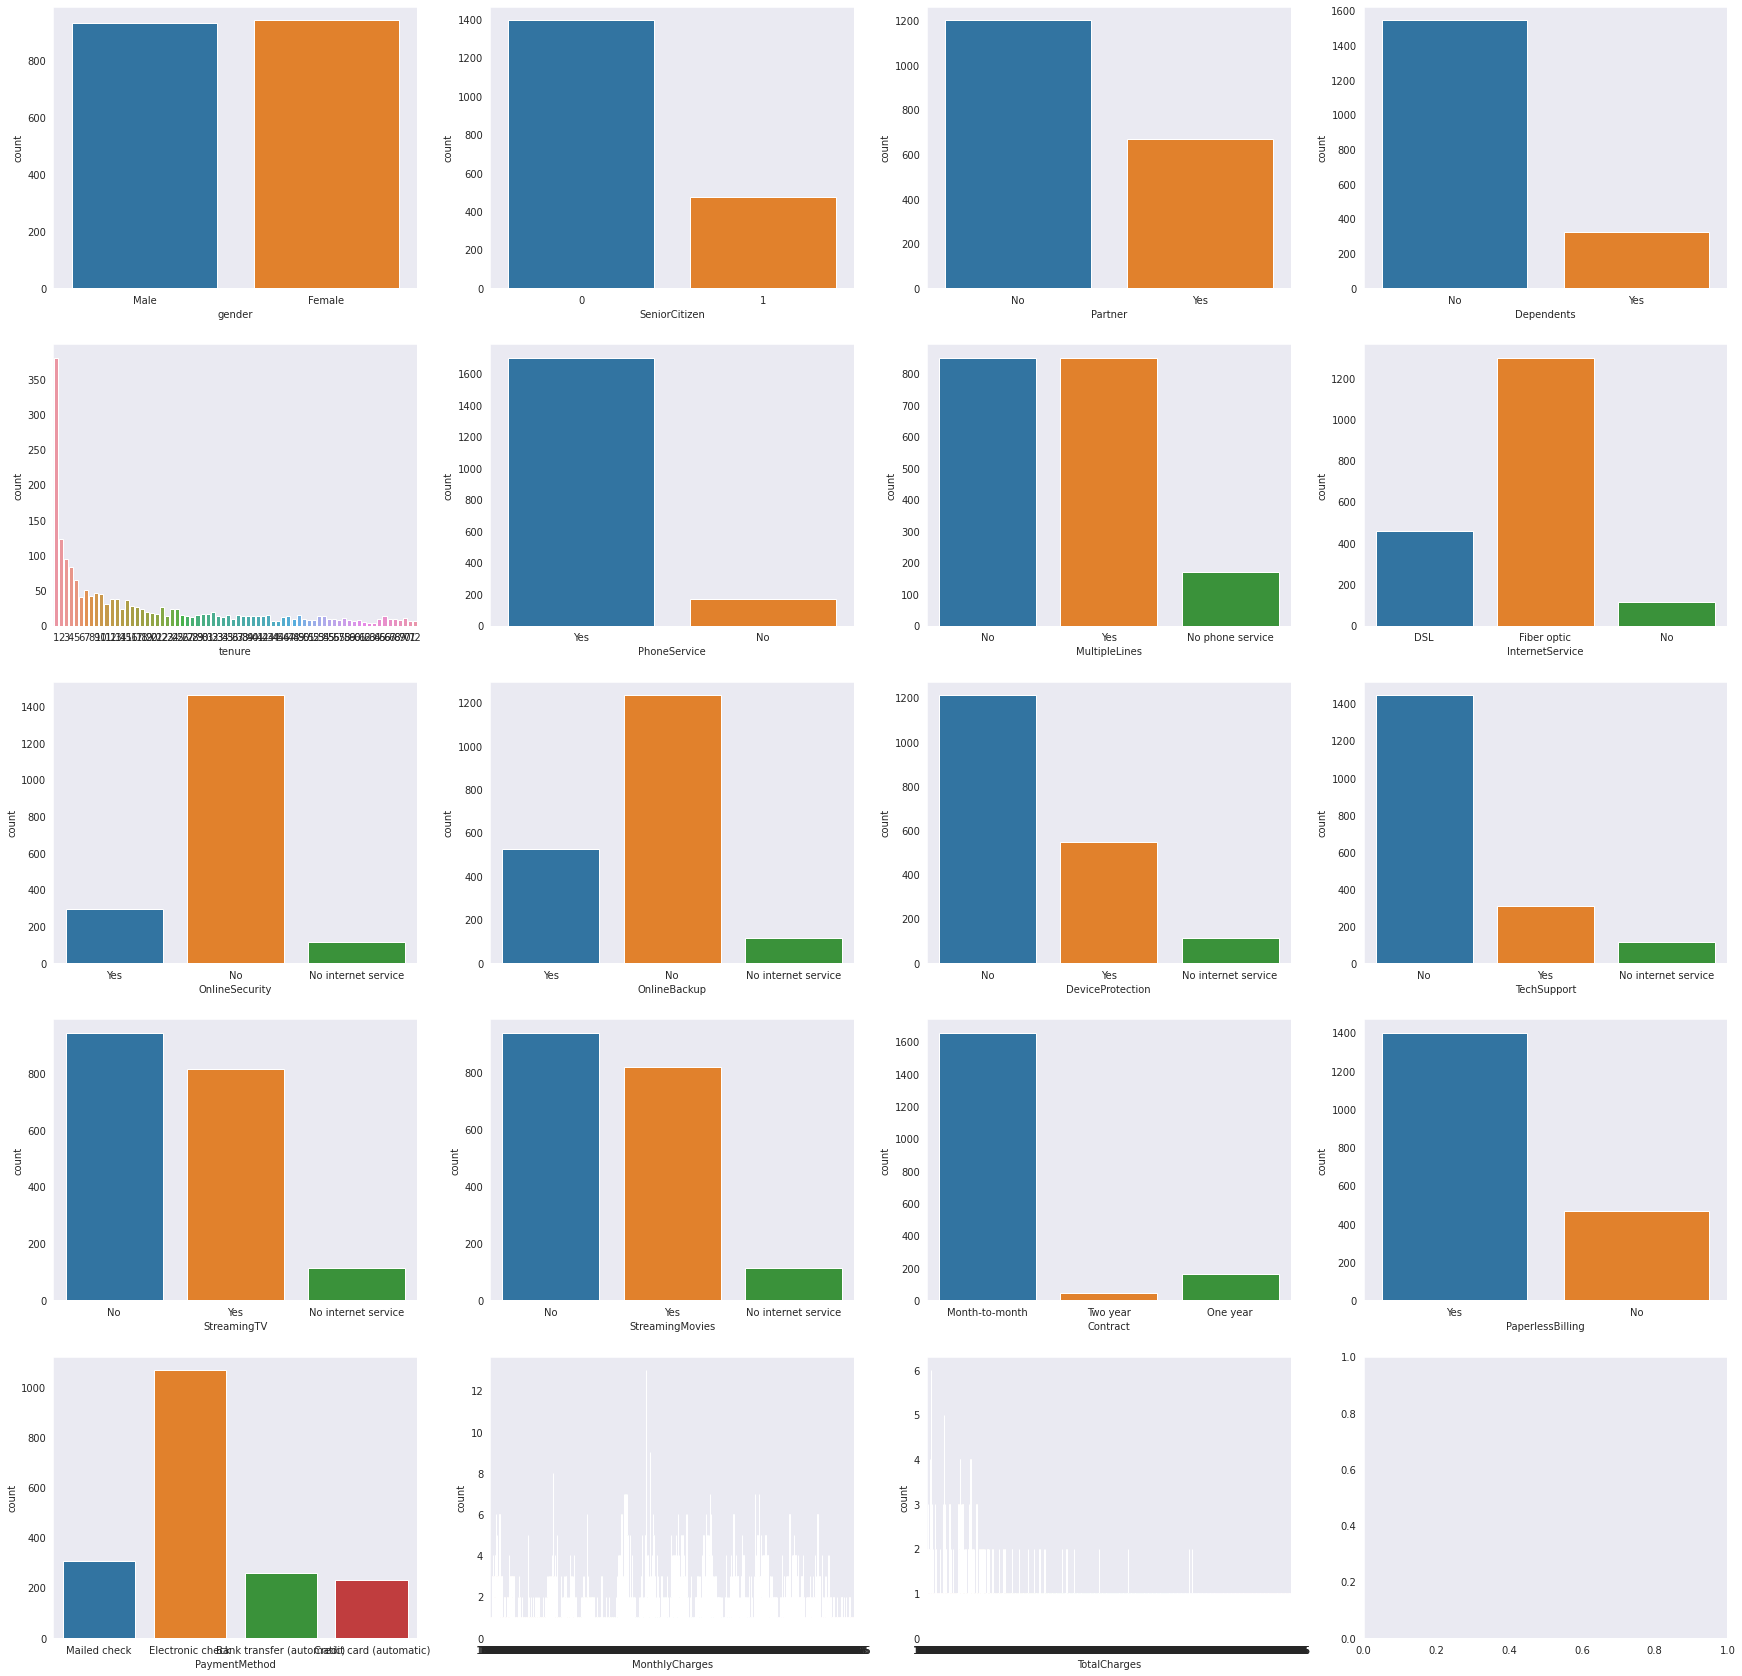

In [ ]:
# Configurações para plotagem de histograma para cada coluna do dataset
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(30,30))

cont_row=0
cont_col=0

for i in df_churn_positive.columns:
    sns.countplot(df_churn_positive[i], ax=ax[cont_row][cont_col])
    cont_col += 1
    if cont_col== 3 and cont_row == 4:
      break;
    if cont_col == 4:
     cont_col = 0
     cont_row += 1
     if cont_row == 5:
       break;


Através desses *Plots* conseguimos extrair os seguintes insights:

* A distribuição de gênero para *churn* está completamente balanceada, ou seja, praticamente o mesmo número de homens e mulheres desistem de planos;

* A maioria do *churn* acontece em uma faixa etária abaixo dos 65 anos;

* Quase o dobro das desistências acontece em pessoas solteiras e sem dependentes, comparadas a quem possui companheiros e dependentes;

* A maioria das desistências acontece em pessoas que tem serviços contratados de telefonia e fibra óptica;

* A maioria do *churn* acontece em clientes que não possuem sserviços de segurança online, backup, proteção de aparelho e suporte técnico contratados;

* As desistências são um pouco mais frequentes em quem tem serviços de streaming contratados;

* A maioria dos cancelamentos acontecem em contas pagas mensalmente por meios eletrônicos e recebidas online.

De maneira geral, percebe-se que a taxa de *churn* é mais presente em clientes mais jovens, com poucos serviços contratados. Presume-se que pessoas mais velhas com mais serviços contratados possuem certa fidelidade a empresa. Um ponto que podemos ressaltar também é que o uso de tecnologias está mais presente em gerações mais novas, o que facilita de certa forma a busca por outros planos mais compatíveis com o seu consumo.

## ***Preparando o Terreno***
________________________________________________________________________________

Os algoritmos de Machine Learning, apesar de entenderem variáveis categóricas, precisam receber essa informação em forma númérica, o que otimiza e muito o processo. Nossa tabela possui várias colunas categóricas e com diferentes características, o que nos exigira a aplicação de duas técnicas.

### ***Feature Scaling* com *Label Encoder***
________________________________________________________________________________

O *Label Encoder* deriva da biblioteca *ScikitLearn* e basicamente assume valores para cada variável categórica. Iremos aplicar ele nas colunas onde as variações não ultrapassam de 2. Dessa maneira, não criamos hierarquia de valores, o que poderia interferir no nosso modelo. 

In [ ]:
# Importação de biblioteca necessária
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Instanciamento
LE = LabelEncoder()

# Seleção das colunas com 2 tipos de variáveis
col_LE = df_churn.nunique().index[df_churn.nunique()==2]

# Iteração nas colunas selecionadas
for i in col_LE:
  df_churn[i] = LE.fit_transform(df_churn[i])

### ***Feature Scaling* com *Get Dummies***
________________________________________________________________________________

O *Get Dummies* deriva da biblioteca *Pandas* e basicamente cria uma nova coluna com o nome da variável categórica e assume valores binários para afirmar a presença da característica. Dessa maneira, nossas variações serão 0 e 1, sem criação de hierarquia.

In [ ]:
# Seleção das colunas com mais de 2 tipos de variáveis
col_du = df_churn.nunique().index[df_churn.nunique()<5].drop(col_LE)

# Aplicação do método no dataset
df_churn = pd.get_dummies(df_churn, columns=col_du)


In [ ]:
# Visualização das primeiras entradas do dataset depois da aplicação dos métodos
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


### **Divisão dos dados de treino e validação**
________________________________________________________________________________

Como nossos modelos de machine learning possuirão características de sistemas supervisionados, iremos dividir os dados em conjunto de *features* e conjunto de *target*. Logo após, dividiremos esses dados em treino e teste. 

In [ ]:
# Importação de biblioteca necessária
from sklearn.model_selection import train_test_split

# Divisão de dados em Features e Target
X = df_churn.drop("Churn", axis=1)
y = df_churn["Churn"]

# Divisão dos dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

## ***Modelos de Machine Learning***
________________________________________________________________________________

Para esse estudo, iremos praticar um fluxo de trabalho diferente do que já vínhamos utilizando. Não iremos apenas injetar os nossos dados em um algoritmo e verificar sua eficácia. Iremos comparar diversos algoritmos através de uma *baseline*, escolher a melhor performance e realizar o *tuning* de hiperparâmetros para otimizar o resultado. Desse maneira, garantimos o melhor modelo para aplicação.

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

Primeiramente, criaremos uma função que iniciará uma *pipeline* onde aplicaremos uma padronização e o algoritmo escolhido, retornando a métrica de recall para análise. A segunda função é similar a primeira, porém sem a padronização. Isso porque aplicaremos uma padronização e um balanceamento posteriormente aos dados.

O objetivo da primeira função é apenas nos inforar um valor base para nossas comparações.



In [ ]:
# Função para criação de pipeline com padronização
def val_model1 (X, y, clf, quite=False):
  X = np.array(X)
  y = np.array(y)

  model = make_pipeline(StandardScaler(),clf)
  scores = cross_val_score (model, X, y, scoring='recall')

  if quite == False:
    print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
  return scores.mean()

In [ ]:
# Função para criação de pipeline sem padronização
def val_model2 (X, y, clf, quite=False):
  X = np.array(X)
  y = np.array(y)

  model = make_pipeline(clf)
  scores = cross_val_score (model, X, y, scoring='recall')

  if quite == False:
    print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
    
  return scores.mean()

Com as funções definidas, aplicaremos o algoritmo *Random Forest* diretamente nos nossos dados de treino.

In [ ]:
# Importação de biblioteca necessária
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instanciamento e aplicação de algoritmo através de função
rf = RandomForestClassifier()
score_baseline = val_model1(X_train, y_train, rf)

Recall: 0.48 (+/- 0.03)


Assim, obtemos um *Recall* de 0,48. Essa será nossa base de comparação para outros algoritmos. Lembrando que os dados utilizados também não foram balanceados, procedimento que faremos a seguir.

In [ ]:
#  Padronização dos dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

0    1374
1    1374
Name: Churn, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


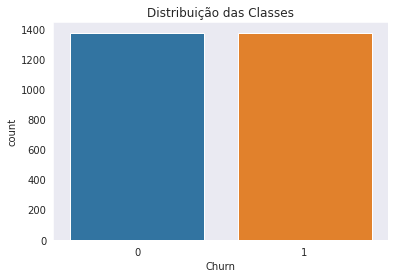

In [ ]:
# Importação de bibliotecas necessárias
from imblearn.under_sampling import RandomUnderSampler

# Usar técnica under-sampling para balanceamento
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de classes
fig, ax = plt.subplots()

sns.countplot(y_rus, ax=ax)

ax.set_title ("Distribuição das Classes")

plt.show()

Com dos dados balanceados e padronizados, iremos utilizar a segunda função para aplicação dos seguintes algoritmos:

* Random Forest
* Decision Tree
* Stochastic Gradient Descent
* SVC
* Regressão Logística
* LightGBM

In [ ]:
# Importação dos pacotes necessários
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
# Instanciamento de modelos
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

model = []
recall = []

# Avaliação de desempenho (recall)
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(val_model2(X_rus, y_rus, clf, quite=True))

# Montagem de tabela comparativa
pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
RandomForestClassifier,0.751806
DecisionTreeClassifier,0.676841
SGDClassifier,0.758381
SVC,0.777290
LogisticRegression,0.795498
XGBClassifier,0.790405
LGBMClassifier,0.759082


Observa-se claramente o impacto do balanceamento da coluna *Target* na performance do algoritmo. Para o *Random Forest*, tivemos um salto para 0,75 de *Recall*. Porém, na comparação geral, a *Regressão Logística* saiu na frente, contudo, iremos utilizar o *XGBClassifier* para o *tuning* pois possui uma gama maior de parâmetros para testes.

In [ ]:
# Importação de bibliotecas necessárias
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

Iremos encontrar os melhores parâmetros através do *GridSearchCV*. Para início, testaremos algums valores de *n_estimators*. Encontrando esse valor, testaremos valores para *max_depth*, *min_child_weight*, *gamma* e *learning_rate*, sempre incluindo-os nas novas buscas.

In [ ]:
# Melhor parâmetro para n_estimator

# Instanciamento de modelo
xgb = XGBClassifier(learning_rate=0.1)

# Parâmetros para teste
param_grid = {
 'n_estimators':range(0,1000,50),
}

# Identificação de melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# Impressão de resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.80352269120914 para {'n_estimators': 50}


In [ ]:
# Melhor parâmetro para max_depth e min_child_weight

# Instanciamento de modelo
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50)

# Parâmetros para teste
param_grid = {
 'max_depth':range(1,8,1),
 'min_child_weight':range(1,5,1)
}

# Identificação de melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# Impressão de resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8079286998836348 para {'max_depth': 1, 'min_child_weight': 1}


In [ ]:
# Melhor parâmetro para gamma

# Instanciamento de modelo
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, max_depth=1, min_child_weight=1)

# Parâmetros para teste
param_grid = {
 'gamma':[i/10.0 for i in range(0,5)]
}

# Identificação de melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# Impressão de resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8129852956733312 para {'gamma': 0.0}


In [ ]:
# Melhor parâmetro para learning_rate

# Instanciamento de modelo
xgb = XGBClassifier(n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)

#Parâmetros para teste
param_grid = {
 'learning_rate':[0.001, 0.01, 0.1, 1]
}

# Identificação de melhor parâmetro
kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb, param_grid, scoring="recall", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus, y_rus)

# Impressão de resultados
print("Melhor: {} para {}".format(grid_result.best_score_, grid_result.best_params_))

Melhor: 0.8886173701470431 para {'learning_rate': 0.001}


Portanto, nossos melhores parâmetros foram:

* learning_rate: 0.001
* n_estimator: 50
* max_depth: 1
* min_child_weight: 1
* gamma: 0.0


Finalmente, aplicaremos nosso modelo otimizado em dados de teste e verificaremos sua performance.

In [ ]:
# Instalação de biblioteca necessária
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importação de bibliotecas necessárias
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1266
           1       0.44      0.88      0.59       495

    accuracy                           0.66      1761
   macro avg       0.68      0.72      0.65      1761
weighted avg       0.79      0.66      0.67      1761

AUC: 0.7235



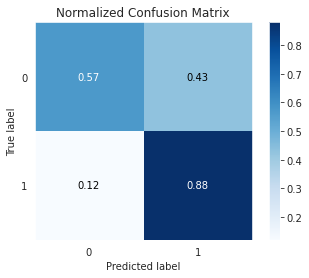

In [ ]:
# Modelo Final
xgb = XGBClassifier(learning_rate=0.001 , n_estimators=50, max_depth=1, min_child_weight=1, gamma=0.0)
xgb.fit(X_rus, y_rus)

# Realização das previsões
X_test = scaler.transform(X_test)
y_pred = xgb.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Impressão da área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# Plot matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

## ***Conclusão***
______________________________________________________________________________

Nesse estudo ficou evidente a importância de métricas para tomada de decisão. Na seção *Análise Exploratória*, observamos que entender perfis de usuários que tendem a desistir de alguma assinatura pode gerar movimentações mais acertivas da empresa para a retenção desse cliente, uma vez que essas ações são mais baratas se comparadas a novas pessoas. Também entedemos a importância do *Feature Scaling* e do Balanceamento no uso de algoritmos, bem como possuir uma métrica base para comparação. 

Cada algoritmo performa de uma maneira diferente e compará-los para a escolha do melhor é uma boa prática para a otimização de sua aplicação. Utilizar ferramentas automatizadas que nos indicam os melhores parâmetros também nos ajudam a tirar o máximo de cada modelo.


## ***Referências***
______________________________________________________________________________

*  Kim, S., & Lee, H. (2021). Customer Churn Prediction in Influencer Commerce: An Application of Decision Trees. Procedia Computer Science, 199, 1332–1339. https://doi.org/10.1016/j.procs.2022.01.169 

*  Sulikowski, P., & Zdziebko, T. (2021). Churn factors identification from real-world data in the telecommunications industry: Case study. Procedia Computer Science, 192, 4800–4809. https://doi.org/10.1016/j.procs.2021.09.258 